# Dataset Crop Production in India
## This dataset provides a huge amount of information on crop production in India ranging from several years. Based on the Information the ultimate goal would be to predict crop production using powerful machine learning techniques.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
#import some useful packages, later probably we will need more

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
# readin the data
data = pd.read_csv('gdrive/MyDrive/crop_production.csv/crop_production.csv')
data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


# Here starts the EDA

In [4]:
data.shape

(246091, 7)

In [5]:
# checking the amount of levels for each factor present
for i in data.columns[:4]:
  print(data[i].value_counts())

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

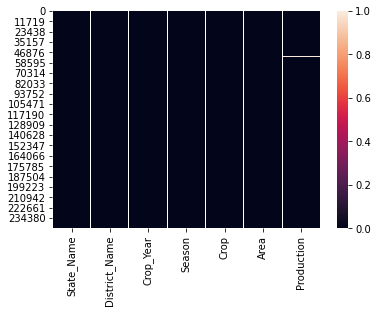

In [6]:
#the dataset looks complete, no nan apart for some in production column
sns.heatmap(.isnull())

In [7]:
# as we see here, production misses more or less 2k rows 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB


In [8]:
# and now I can plot the production for differnt states
# but wait they re divided in different crops and varying areas...
data['State_Name'].value_counts()

Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       1266
Mizoram                          957
P

            Crop_Year      Area  Production
Crop_Year    1.000000 -0.026022    0.006989
Area        -0.026022  1.000000    0.040587
Production   0.006989  0.040587    1.000000


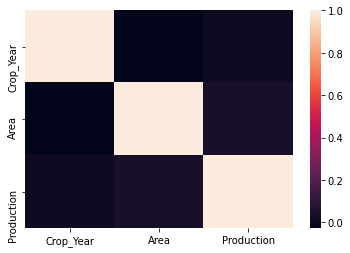

In [9]:
# check for correlation
print(data.corr())
sns.heatmap(data.corr())
# alost no correlation. Strange in the case of area and production!!

In [10]:
# the amount of states is definitely too high here we see:
print(' the number of states in India is ', len(data['State_Name'].unique()))
# we need to summarize between different regions. Acoording to vivekkumarprajapati, we divide the states in 
# different geographical regions 

#Zone-Wise Production - 1997-2014
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

 the number of states in India is  33


In [11]:
# adn we assign them to the Zones
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

data['Zones'] = data.apply(get_zonal_names, axis=1)
data['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [12]:
#now we grouped the states in 6 macro areas
data['Zones'].value_counts()

South Zone      54207
North Zone      51468
East Zone       43339
West Zone       33786
Central Zone    33652
NE Zone         28297
Union Terr       1342
Name: Zones, dtype: int64

In [13]:
data['Crop'].value_counts().index

Index(['Rice', 'Maize', 'Moong(Green Gram)', 'Urad', 'Sesamum', 'Groundnut',
       'Sugarcane', 'Wheat', 'Rapeseed &Mustard', 'Arhar/Tur',
       ...
       'Jobster', 'Perilla', 'Turnip', 'Coffee', 'Litchi', 'Plums', 'Pear',
       'Apple', 'Peach', 'Other Dry Fruit'],
      dtype='object', length=124)

Rice                 15104
Maize                13947
Moong(Green Gram)    10318
Urad                  9850
Sesamum               9046
                     ...  
Plums                    6
Pear                     6
Apple                    4
Peach                    4
Other Dry Fruit          1
Name: Crop, Length: 124, dtype: int64
the number of cultivated crops is  124


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'barplot of different crops')

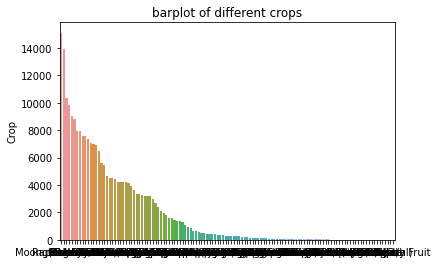

In [14]:
# lets check how many types of crops are cultivated, we might need to summarize them
print(data['Crop'].value_counts())
print('the number of cultivated crops is ', len(data['Crop'].unique()))
ax = sns.barplot(data['Crop'].value_counts().index, data['Crop'].value_counts())
ax.set_title('barplot of different crops')
# this barplot looks too chaotic, we will need to work a bit on that
#ax.set_xticklabels(ax.get_xticklabels(), rotation=90) #this is to plot the x labels in vertical

In [15]:
# again according to the aforementioned author we have to summarize the crops in macro groups

crop = data['Crop']
def cat_crop(crop):
    for i in ['Rice','Maize','Wheat','Barley','Varagu','Other Cereals & Millets','Ragi','Small millets','Bajra','Jowar', 'Paddy','Total foodgrain','Jobster']:
        if crop == i:
            return 'Cereal'
    for i in ['Moong','Urad','Arhar/Tur','Peas & beans','Masoor',
              'Other Kharif pulses','other misc. pulses','Ricebean (nagadal)',
              'Rajmash Kholar','Lentil','Samai','Blackgram','Korra','Cowpea(Lobia)',
              'Other  Rabi pulses','Other Kharif pulses','Peas & beans (Pulses)','Pulses total','Gram']:
        if crop == i:
            return 'Pulses'
    for i in ['Peach','Apple','Litchi','Pear','Plums','Ber','Sapota','Lemon','Pome Granet',
               'Other Citrus Fruit','Water Melon','Jack Fruit','Grapes','Pineapple','Orange',
               'Pome Fruit','Citrus Fruit','Other Fresh Fruits','Mango','Papaya','Coconut','Banana']:
        if crop == i:
            return 'Fruits'
    for i in ['Bean','Lab-Lab','Moth','Guar seed','Soyabean','Horse-gram']:
        if crop == i:
            return 'Beans'
    for i in ['Turnip','Peas','Beet Root','Carrot','Yam','Ribed Guard','Ash Gourd ','Pump Kin','Redish','Snak Guard','Bottle Gourd',
              'Bitter Gourd','Cucumber','Drum Stick','Cauliflower','Beans & Mutter(Vegetable)','Cabbage',
              'Bhindi','Tomato','Brinjal','Khesari','Sweet potato','Potato','Onion','Tapioca','Colocosia']:
              if crop == i:
                return 'Vegetables'
    for i in ['Perilla','Ginger','Cardamom','Black pepper','Dry ginger','Garlic','Coriander','Turmeric','Dry chillies','Cond-spcs other']:
        if crop == i:
            return 'spices'
    for i in ['other fibres','Kapas','Jute & mesta','Jute','Mesta','Cotton(lint)','Sannhamp']:
        if crop == i:
            return 'fibres'
    for i in ['Arcanut (Processed)','Atcanut (Raw)','Cashewnut Processed','Cashewnut Raw','Cashewnut','Arecanut','Groundnut']:
        if crop == i:
            return 'Nuts'
    for i in ['other oilseeds','Safflower','Niger seed','Castor seed','Linseed','Sunflower','Rapeseed &Mustard','Sesamum','Oilseeds total']:
        if crop == i:
            return 'oilseeds'
    for i in ['Tobacco','Coffee','Tea','Sugarcane','Rubber']:
        if crop == i:
            return 'Commercial'

data['cat_crop'] = data['Crop'].apply(cat_crop)

Cereal        63800
Pulses        41689
oilseeds      34454
Vegetables    23325
spices        21986
Nuts          11588
Commercial    10716
fibres        10195
Beans          9355
Fruits         6243
Name: cat_crop, dtype: int64
the number of categories in crops is  11


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[Text(0, 0.5, 'rows in the dataframe per category'),
 Text(0.5, 0, 'categories')]

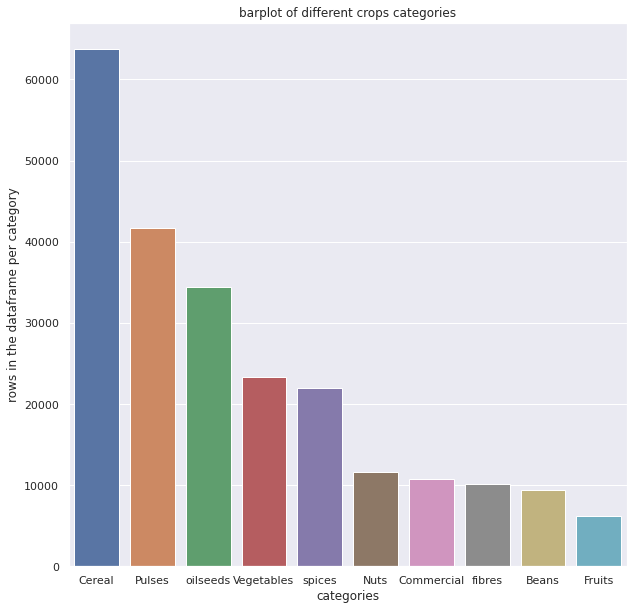

In [16]:
# lets check teh result of our summary
print(data['cat_crop'].value_counts())
print('the number of categories in crops is ', len(data['cat_crop'].unique()))

# and plot them
sns.set(rc={'figure.figsize':(10,10)})
ax = sns.barplot(data['cat_crop'].value_counts().index, data['cat_crop'].value_counts())
ax.set_title('barplot of different crops categories')
ax.set(xlabel='categories', ylabel='rows in the dataframe per category')

# we can say that most probably the cereals are the most cultivated and with the largest production. HOwever, this barplot
# tells only how many times they recurred in the dataset. Further analysis is required

In [17]:
# here we see the distribution of the categories in teh different macro regions
data.groupby(['Zones', 'cat_crop']).count()['Production'].unstack()

# here we are simply reporting the number of cells with that determined combination of factors

cat_crop,Beans,Cereal,Commercial,Fruits,Nuts,Pulses,Vegetables,fibres,oilseeds,spices
Zones,,,,,,,,,,
Central Zone,1608.0,6920.0,1142.0,923.0,1029.0,6080.0,3881.0,1457.0,4777.0,4027.0
East Zone,1163.0,12771.0,1735.0,226.0,2016.0,7428.0,3550.0,1918.0,6505.0,3000.0
NE Zone,495.0,6645.0,1607.0,1318.0,851.0,4466.0,3210.0,1954.0,3914.0,2774.0
North Zone,1875.0,15019.0,2452.0,345.0,1296.0,10224.0,5144.0,1249.0,6169.0,3644.0
South Zone,2223.0,12423.0,2198.0,2730.0,4094.0,6473.0,5688.0,1697.0,6413.0,6271.0
Union Terr,NaN,334.0,57.0,98.0,144.0,174.0,104.0,46.0,92.0,142.0
West Zone,1751.0,9171.0,1370.0,513.0,2042.0,6053.0,1577.0,1464.0,5931.0,1780.0


[Text(0, 0.5, 'rowsProduction'), Text(0.5, 0, 'Zone')]

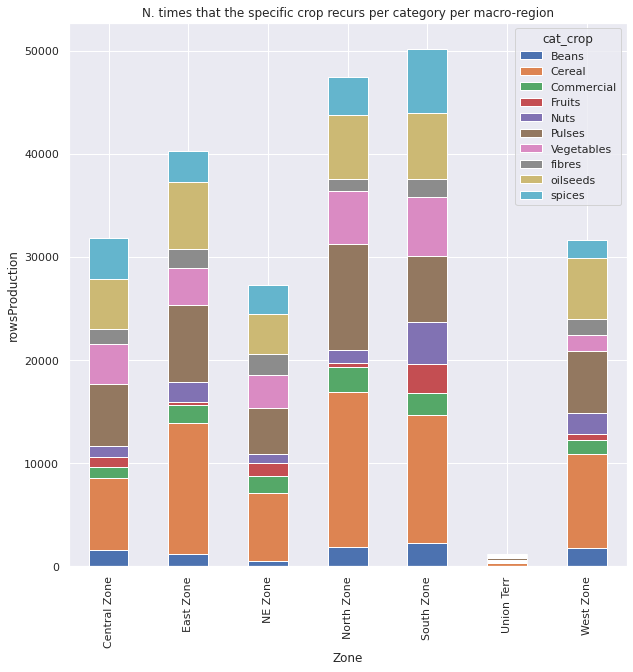

In [18]:
# now we plot according to different categories in different macro regions
ax = data.groupby(['Zones', 'cat_crop']).count()['Production'].unstack().plot.bar(stacked=True)
ax.set_title('N. times that the specific crop recurs per category per macro-region')
ax.set(xlabel='Zone', ylabel='rowsProduction')

In [19]:
# here we are selecting only the cereals, as they are those who probably produced the most (actually that are most recurrent)
data_cereals = data[data['cat_crop'] == 'Cereal']
data_cereals.dropna(inplace = True)
data_cereals.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Union Terr,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Union Terr,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Union Terr,Cereal


[Text(0, 0.5, 'sum of the production'), Text(0.5, 0, 'Zone')]

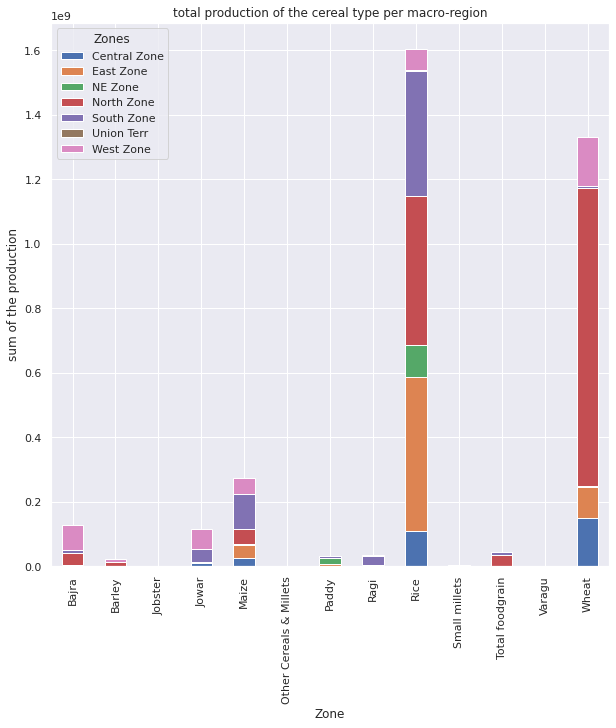

In [20]:
# We see that in absolute terms rice in these year is the most produced, followed by wheat.
# we this graph we cannot saying anything in relation to the last years, as it is a total sum

ax =  data_cereals.groupby(['Crop', 'Zones']).sum()['Production'].unstack().fillna(0).plot.bar(stacked=True)

ax.set_title('total production of the cereal type per macro-region')
ax.set(xlabel='Cereal type', ylabel='sum of the production')

[Text(0, 0.5, 'sum of the production'), Text(0.5, 0, 'Macro Region')]

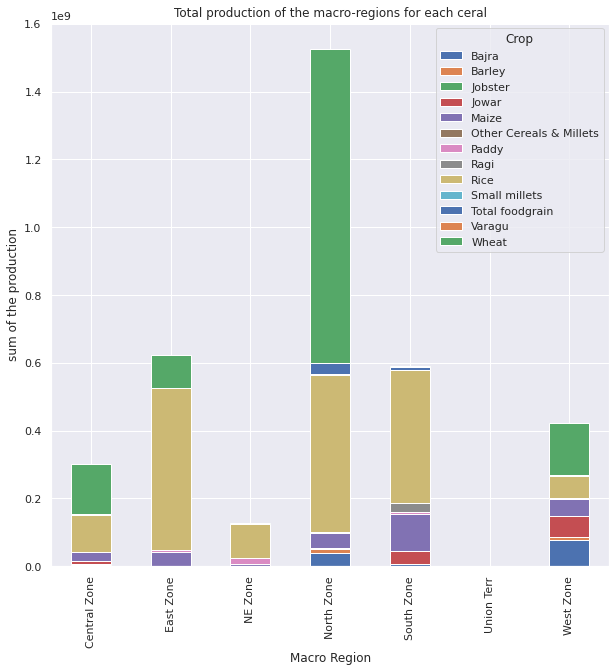

In [22]:
# We see that in absolute terms rice in these year is the most produced, followed by wheat.
# we this graph we cannot saying anything in relation to the last years, as it is a total sum

ax =  data_cereals.groupby(['Zones','Crop']).sum()['Production'].unstack().fillna(0).plot.bar(stacked=True)

ax.set_title('Total production of the macro-regions for each ceral')
ax.set(xlabel='Macro Region', ylabel='sum of the production')

From the two graphs above we can say that:
1. Rice and Wheat are by far the most cultivated.
1. North Zone seems to be by far the region with the largest production

In [23]:
data_cereals.groupby(['Zones','Crop',]).sum()['Production'].unstack().fillna(0)

Crop,Bajra,Barley,Jobster,Jowar,Maize,Other Cereals & Millets,Paddy,Ragi,Rice,Small millets,Total foodgrain,Varagu,Wheat
Zones,,,,,,,,,,,,,
Central Zone,4445162.3,1725446.00,0.0,10141637.0,2.489808e+07,0.0,1530500.0,36656.80,1.091213e+08,2012700.0,0.0,0.0,148827976.0
East Zone,64920.0,414439.52,0.0,131601.0,4.028164e+07,0.0,6204467.0,1597036.78,4.770659e+08,208047.0,0.0,0.0,97495236.0
NE Zone,24230.0,57938.00,1180.0,20840.0,5.281954e+06,21957.0,19095877.0,1700.00,9.936938e+07,699062.0,264842.0,0.0,1606962.0
North Zone,38076272.7,12457526.40,0.0,4818426.1,4.416427e+07,521729.7,0.0,2391068.00,4.625489e+08,973779.1,33813088.0,0.0,926972177.8
South Zone,8141147.0,0.00,0.0,38114172.0,1.085974e+08,77730.0,4816536.0,28398281.00,3.894912e+08,1299147.1,9121209.0,49694.0,4009772.0
Union Terr,3040.0,0.00,0.0,7819.0,1.467620e+03,729.0,55021.0,33991.00,1.663829e+06,3306.0,0.0,0.0,17134.0
West Zone,78926224.0,7442917.00,0.0,61363764.0,5.011699e+07,563900.0,0.0,2672667.58,6.620980e+07,434334.4,71618.0,0.0,153896399.0


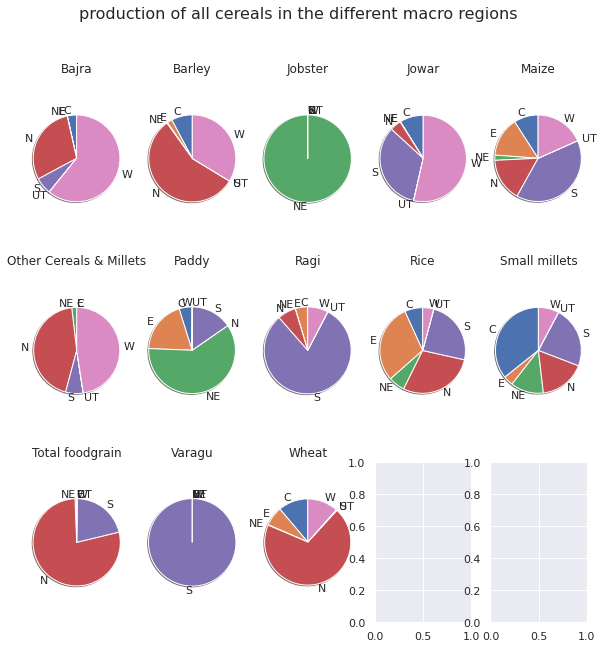

In [71]:
# in this pieplot we see the different cereals in their total production expressed in % in relation to the 6 macroareas

labels = ['C', 'E', 'NE', 'N', 'S', 'UT', 'W'] 

import itertools


count = 0
fig1, ax1 = plt.subplots(3,5, figsize=(10,10))
fig1.suptitle('production of all cereals in the different macro regions', fontsize=16)

for i in range(0,3):
  for j in range(0,5): 
    #print(i*j, count)
    if i*j < 6: #this is only to avoid the error report, as we have less than i*j plots, we have only 13, so two subplots will remain empty

          ax1[i,j].pie(data_cereals.groupby(['Zones','Crop',]).sum()['Production'].unstack().fillna(0).iloc[:,count], 
                      labels = labels, shadow = True, startangle = 90)
          ax1[i,j].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
          ax1[i,j].title.set_text(data_cereals.groupby(['Zones','Crop',]).sum()['Production'].unstack().fillna(0).columns[count])
          count =+ count + 1
          #print(i, j, count)
plt.show()


As it can be seen in the above plots, certain cereals are only cultivated in certain areas (Varagu only in the south zone, and Jobster in the north East). 
ON the other hand rice is almost heavenly cultived across India, while wheat way more in the North.

# Now we will focus on rice and wheat, as they are the most important

# **RICE FIRST**

In [38]:
# here we are selecting only the data_rice, as they are those who probably produced the most (actually that are most recurrent)
data_rice = data[data['Crop'] == 'Rice']
data_rice.dropna(inplace = True)
data_rice.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Union Terr,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Union Terr,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Union Terr,Cereal


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


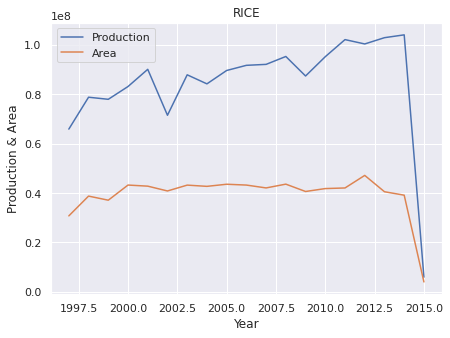

In [68]:
# here we see the rice production in these years
data_rice.groupby(["Crop_Year"])['Production', 'Area'].sum().plot(legend=True, xlabel = 'Year',title = 'RICE', ylabel = 'Production & Area', figsize =(7,5))
# it has dropped in the last year, probably because the data are incomplete. it is almost 100 times less. It can't be so small
# However we see that the production is increased more than the area. There must have been some sort of technological improvement

In [74]:
data_rice

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones,cat_crop
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,Union Terr,Cereal
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,Union Terr,Cereal
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,Union Terr,Cereal
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,Union Terr,Cereal
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,Union Terr,Cereal
...,...,...,...,...,...,...,...,...,...
246049,West Bengal,PURULIA,2013,Summer,Rice,516.00,1274.00,East Zone,Cereal
246052,West Bengal,PURULIA,2013,Winter,Rice,302274.00,730136.00,East Zone,Cereal
246058,West Bengal,PURULIA,2014,Autumn,Rice,264.00,721.00,East Zone,Cereal
246086,West Bengal,PURULIA,2014,Summer,Rice,306.00,801.00,East Zone,Cereal


# applying multiple linear regression & Random forest for Rice

In [92]:
# here we select all those years before 2015 (where we clearly have missing data)
data_rice_dropped = data_rice[data_rice['Crop_Year'] <= 2014]
data_rice_dropped.Crop_Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2010, 2006, 1997, 1998, 1999,
       2007, 2008, 2009, 2011, 2012, 2013, 2014])

In [93]:
# here we do some work to prepare the variables. we scale them and we prepare the dummies
from sklearn.preprocessing import StandardScaler

dummies = pd.get_dummies(data_rice_dropped[['Season','State_Name','District_Name', 'Crop_Year', 'Area']])
scale = StandardScaler()
dummies_scaled = dummies.copy()
dummies_scaled[['Crop_Year','Area']]= scale.fit_transform(dummies[['Crop_Year','Area']])
y = data_rice_dropped['Production']

In [94]:
# and splitting the dataset in train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummies_scaled, y, test_size=0.30, random_state=42)

In [100]:
X_train

,Crop_Year,Area,Season_Autumn,Season_Kharif,Season_Rabi,Season_Summer,Season_Whole Year,Season_Winter,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,State_Name_Goa,State_Name_Gujarat,State_Name_Haryana,State_Name_Himachal Pradesh,State_Name_Jammu and Kashmir,State_Name_Jharkhand,State_Name_Karnataka,State_Name_Kerala,State_Name_Madhya Pradesh,State_Name_Maharashtra,State_Name_Manipur,State_Name_Meghalaya,State_Name_Mizoram,State_Name_Nagaland,State_Name_Odisha,State_Name_Puducherry,State_Name_Punjab,State_Name_Rajasthan,State_Name_Sikkim,State_Name_Tamil Nadu,State_Name_Telangana,State_Name_Tripura,State_Name_Uttar Pradesh,State_Name_Uttarakhand,...,District_Name_UDUPI,District_Name_UJJAIN,District_Name_UKHRUL,District_Name_UMARIA,District_Name_UNA,District_Name_UNAKOTI,District_Name_UNNAO,District_Name_UPPER SIANG,District_Name_UPPER SUBANSIRI,District_Name_UTTAR KANNAD,District_Name_UTTAR KASHI,District_Name_VADODARA,District_Name_VAISHALI,District_Name_VALSAD,District_Name_VARANASI,District_Name_VELLORE,District_Name_VIDISHA,District_Name_VILLUPURAM,District_Name_VIRUDHUNAGAR,District_Name_VISAKHAPATANAM,District_Name_VIZIANAGARAM,District_Name_WARANGAL,District_Name_WARDHA,District_Name_WASHIM,District_Name_WAYANAD,District_Name_WEST DISTRICT,District_Name_WEST GARO HILLS,District_Name_WEST GODAVARI,District_Name_WEST JAINTIA HILLS,District_Name_WEST KAMENG,District_Name_WEST KHASI HILLS,District_Name_WEST SIANG,District_Name_WEST SINGHBHUM,District_Name_WEST TRIPURA,District_Name_WOKHA,District_Name_YADGIR,District_Name_YAMUNANAGAR,District_Name_YANAM,District_Name_YAVATMAL,District_Name_ZUNHEBOTO
73966,-1.722658,-0.119262,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
191554,-0.129805,0.287936,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
89661,1.463048,0.011323,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149571,-1.324445,-0.430117,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
21009,-0.926231,-0.696493,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76606,-0.528018,1.080757,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
224424,-1.324445,1.455630,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
80222,-1.722658,-0.701262,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13372,-1.523551,0.096718,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [99]:
# the first model is the linear one
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

regr = linear_model.LinearRegression()
cv = cross_val_score(regr, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())
# a negative score means that the model is doing worse than the null hypothesis. Really really bad

[-4.13268535e+20 -2.90468640e+16 -5.73019481e+13 -2.39008430e+21
 -6.11405480e+17]
-5.607986689693279e+20


In [103]:
# the second a random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())
# while this one is almost perfect!!

[0.95963386 0.95061979 0.96070657 0.96160723 0.96498085]
0.9595096598483048


In [ ]:
# and here finally we get an estimate on teh test dataset.
model = rf.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print('the correlation between the predicted and the test is: ', np.corrcoef(y_predicted, y_test)[0,1])
# really really high correlation. very good!

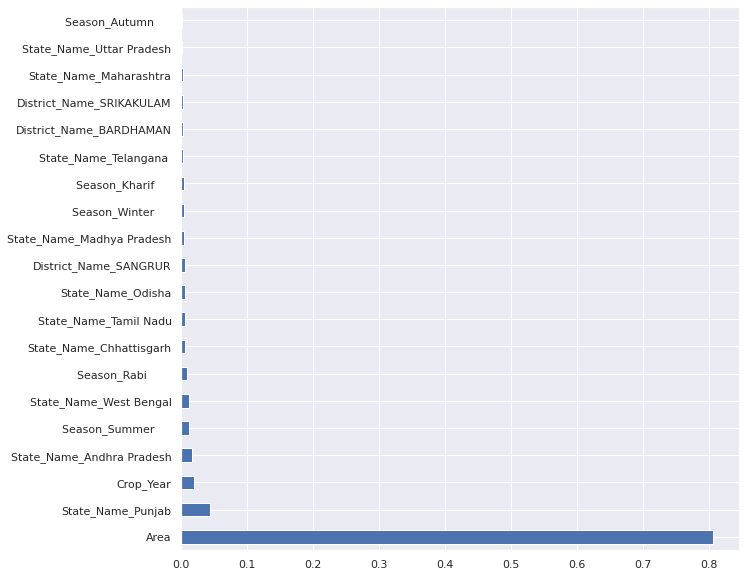

In [109]:
# and here finally I am plotting the feature importance. Clearly areas explains the largest share
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

# **WHEAT**

In [73]:
data_wheat.shape

(7878, 9)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  import sys


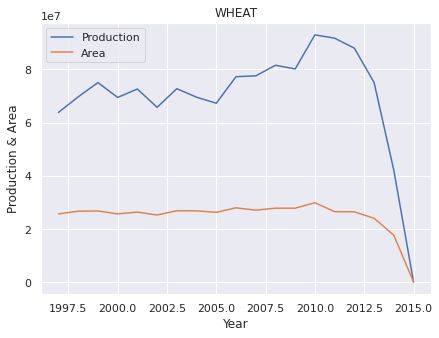

In [72]:
# here we are selecting only the data_wheat, as they are those who probably the second produced the most (actually that are most recurrent)
data_wheat = data[data['Crop'] == 'Wheat']
data_wheat.dropna(inplace = True)
data_wheat.head()

# here we see the wheat production in these years
data_wheat.groupby(["Crop_Year"])['Production', 'Area'].sum().plot(legend=True, xlabel = 'Year', ylabel = 'Production & Area',title = 'WHEAT', figsize =(7,5))
# the same thoughts already expressed for wheat now apply to rice
# However we see that the production is increased more than the area. There must have been some sort of technological improvement

# applying multiple linear regression & Random forest for Wheat

In [ ]:
# here we select all those years before 2015 (where we clearly have missing data)
data_wheat_dropped = data_wheat[data_wheat['Crop_Year'] <= 2014]
data_wheat_dropped.Crop_Year.unique()

In [112]:
# here we do some work to prepare the variables. we scale them and we prepare the dummies
from sklearn.preprocessing import StandardScaler

dummies = pd.get_dummies(data_wheat_dropped[['Season','State_Name','District_Name', 'Crop_Year', 'Area']])
scale = StandardScaler()
dummies_scaled = dummies.copy()
dummies_scaled[['Crop_Year','Area']]= scale.fit_transform(dummies[['Crop_Year','Area']])
y = data_wheat_dropped['Production']

In [114]:
# and splitting the dataset in train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dummies_scaled, y, test_size=0.30, random_state=42)

In [115]:
# the model is random forest regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state = 1)
cv = cross_val_score(rf, X_train, y_train, cv = 5)
print(cv)
print(cv.mean())
# also this one is almost perfect!!

[0.97539462 0.97945912 0.98120125 0.97538482 0.97776798]
0.9778415557280301


In [116]:
# and here finally we get an estimate on the test dataset.
model = rf.fit(X_train, y_train)
y_predicted = model.predict(X_test)
print('the correlation between the predicted and the test is: ', np.corrcoef(y_predicted, y_test)[0,1])
# really really high correlation. very good!

the correlation between the predicted and the test is:  0.9893463952145967


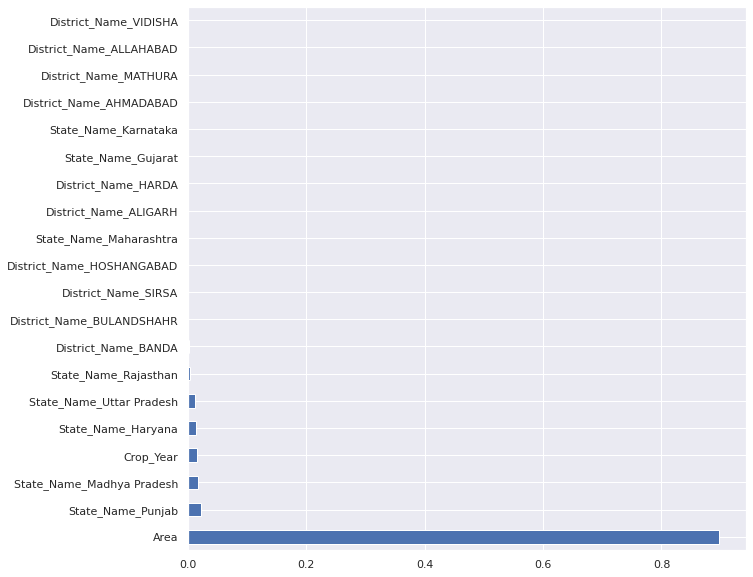

In [117]:
# and here finally I am plotting the feature importance. Clearly areas explains the largest share (even larger than in rice)
feat_importances = pd.Series(model.feature_importances_, index = X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')